In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from sympy import *

In [ ]:
def funcion(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2
    # return -(0.1+(1-x)**2-0.1*math.sin(6*math.pi*(1-x)))+2
    #return -(x)
    #return -(x+0.5)**2

bin_decimal = O(n)

In [ ]:
def bin_decimal(num_binario):
    return (np.sum(num_binario)/len(num_binario))*2



In [ ]:
genetic_pool = [0,1]
y_axis = []
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(funcion(num))

MutarIndividuo = O(n)


In [ ]:
def MutarIndividuo(Individuo, probs): #O(n)
    IndividuoMutado = Individuo[:]                      #O(1)     #O(1)
    for i in range(len(Individuo)):                     #O(n)     #O(TGI)
        if np.random.random()<probs:                    #O(1)     #O(1)
            IndividuoMutado[i] = int(not Individuo[i])  #O(1)     #O(1)
    return IndividuoMutado                              #O(1)     #O(1)

O(n)[2*O(1)] + O(n)*[4*O(1)] + 4*O(1) + O(n)*(3*O(1) + O(n)*[4*O(1)] + 5* [O(1)] + O(n) * [8*O(1)] + O(1)) = O(n^2) + O(n) = O(n^2)


**Complejidad específica:**

O(Tp)[2O(1)] + O(Tp)[4O(1)] + 4O(1) + O(generaciones)(3O(1) + O(Tp)[4O(1)] + 5 [O(1)] + O(Tp/2) ([6O(1)]+ O(TGI) + O(TGI)) + O(1))+ O(generaciones)[O(1)]

= O(Tp) + O(Tp) + O(1) + O(generaciones)(O(1) + O(Tp) + [O(1)] + O(Tp/2)(2 O(TGI)) + O(1)) + O(generaciones)

= 2O(Tp) + O(generaciones)(O(Tp) + 2O(Tp/2)O(TGI))) + O(generaciones)

= O(Tp) + O(generaciones)(O(Tp) + O(Tp)O(TGI))) + O(generaciones)

= O(Tp) + O(generaciones)O(Tp) + O(generaciones)O(Tp)O(TGI) + O(generaciones)

= **[O(generaciones)][O(Tp)][O(TGI)]**

In [ ]:
def Maximizar(TGI, Tp, ProbMut, Generaciones, FuncionOptimizar, RangoBusqueda):  
  
  '''TGI =>Tamaño Genoma Individuos, 
     Tp =>Tamaño Poblacion,
     ProbMut =>ProbabilidadMutacion, 
     Generaciones =>Generaciones a iterar,
     FuncionOptimizar => Funcion a maximizar/optimizar
     Rango de busqueda ''' 

  y_axis = []
  x_axis=np.arange(0,2,0.02)
  for num in x_axis:
    y_axis.append(FuncionOptimizar(num))

  #Creamos la población inicial
  poblacion = [] 
  mejoresIndividuos = []   
  errorProm = []                                                                                                                                                                                                                            
  for i in range(Tp):                                       #O(n)     #O(Tp)
    individuo = list(np.random.choice(RangoBusqueda,TGI))   #O(1)     #O(1) -> rangoBusqueda, TGI
    poblacion.append(individuo)                             #O(1)     #O(1)
  
  #Graficamos la poblacion Inicial
  for individuo in poblacion:                               #O(n)     #O(Tp)
    x = bin_decimal(individuo)                              #O(1)     #O(1)
    y = FuncionOptimizar(x)                                 #O(1)     #O(1)
    plt.plot(x,y,'x')                                       #O(1)     #O(1)
    plt.plot(x_axis,y_axis)                                 #O(1)     #O(1)
  titulo="Generación inicial"                               #O(1)     #O(1)
  plt.title(titulo)                                         #O(1)     #O(1)
  plt.show()                                                #O(1)     #O(1)
  print()                                                   #O(1)     #O(1)

  for i in range(Generaciones):                             #O(n)     #O(generaciones)
    fitness = []                                            #O(1)     #O(1)
    mejoresIndividuos.append((poblacion[np.argmax(FuncionOptimizar)])) #O(1)     #O(1)
    error=0                                                 #O(1)     #O(1)
    for individuo in poblacion:                             #O(n)     #O(Tp)
      x = bin_decimal(individuo)                            #O(1)     #O(1)
      y = FuncionOptimizar(x)                               #O(1)     #O(1)
      error += y                                            #O(1)     #O(1)
  #extraigo los valores de y 
  #para medir su éxito de reproduccion
      fitness += [y]                                        #O(1)     #O(1)
  #convierto fitnees en un vector para realizar operaciones                                     
    fitness = np.array(fitness)                             #O(1)     #O(1)
    error/=Tp                                               #O(1)     #O(1)
    errorProm += [error]                                    #O(1)     #O(1)
    # mejoresIndividuos += [mejor]

    #divido todos los valores de y para la suma total
    #y así obtener valores entre 0 y 1
    fitness = fitness/fitness.sum()                         #O(1)     #O(1)

    #reproducir los individuos
    offspring = []                                          #O(1)     #O(1)
    for i in range(Tp//2):                                  #O(n)     #O(Tp/2)
      parents = np.random.choice(Tp, 2, p=fitness)          #O(1)     #O(1)
      cross_point = np.random.randint(TGI)                  #O(1)     #O(1)
      child_1 = list(poblacion[parents[0]][:cross_point]) + list(poblacion[parents[1]][cross_point:]) #O(1)
      child_2 = list(poblacion[parents[1]][:cross_point]) + list(poblacion[parents[0]][cross_point:]) #O(1)
      #Mutamos los hijos de acuerdo a la probabilidad de mutacion
      child_1 = MutarIndividuo(child_1, ProbMut)            #O(n)     #O(TGI)
      child_2 = MutarIndividuo(child_2, ProbMut)            #O(n)     #O(TGI)
      #agregamos los hijos a la nueva poblacion generada                                                          
      offspring.append(child_1)                             #O(1)     #O(1)
      offspring.append(child_2)                             #O(1)     #O(1)
    poblacion = offspring                                   #O(1)     #O(1)

  #calcular error promedio de cada generacion a partir del valor maximo hallado
  aprox = FuncionOptimizar(bin_decimal(poblacion[np.argmax(funcion)])) #O(1)
  for i in range(len(errorProm)):                           #O(n)     #O(generaciones)
    errorProm[i] = abs(errorProm[i]-aprox)                  #O(1)     #O(1)

  #Grafica generacion final 
  for individuo in poblacion:                               
    x = bin_decimal(individuo)
    # print(x, individuo)
    y = funcion(x)
    plt.plot(x,y,'x')
  plt.plot(x_axis,y_axis)
  titulo="Generación "+str(Generaciones)+" \nMejor individuo: "+str(bin_decimal(poblacion[np.argmax(funcion)]))
  plt.title(titulo)
  plt.xlabel("Generaciones")
  plt.show()
  print()

  #Grafica error promedio
  for i in range (len(errorProm)):
    x = i
    y = errorProm[i]
    plt.plot(x,y,'o')

  titulo="Error promedio de cada generación"
  plt.title(titulo)
  plt.show()
  print()

  #Grafica mejor individuo de cada generacion
  for i in range (len(mejoresIndividuos)):
    x = i
    y = bin_decimal(mejoresIndividuos[i])
    plt.plot(x,y,'x')
  titulo="Mejor individuo de cada generación \nMejor individuo del experimento: "+str(bin_decimal(poblacion[np.argmax(FuncionOptimizar)]))
  plt.title(titulo)
  

In [ ]:
Generaciones = int(input("Ingrese el numero de generaciones: "))
Tp = int(input("Tamaño de la poblacion: "))
ProbMut = float(input("Probabilidad de mutacion: "))
TGI = int(input("Tamaño del genoma de los individuos: "))

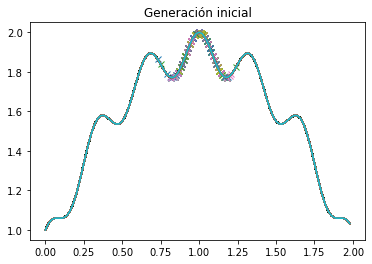

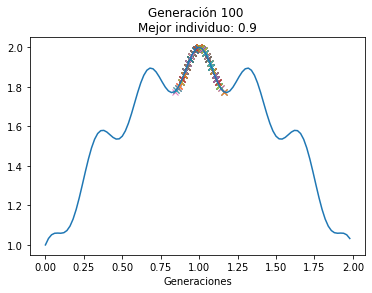

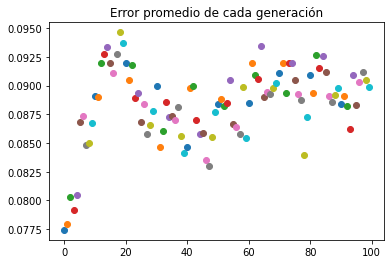

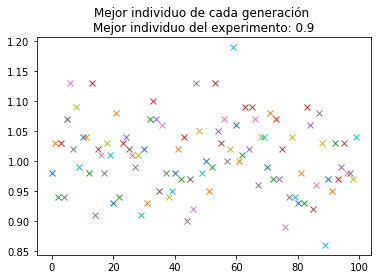

In [ ]:
Maximizar(TGI, Tp, ProbMut, 100, funcion, genetic_pool)